In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from causalnex.structure.notears import from_pandas
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Image
import warnings

warnings.filterwarnings("ignore")

In [49]:
df = pd.read_csv("../data/data.csv")
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [50]:
df.drop('Unnamed: 32', inplace=True, axis=1)
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [52]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [53]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [54]:
df.shape

(569, 32)

In [55]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [56]:
def count_plot(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(10, 8))
    sns.countplot(data=df, x=column)
    plt.xlabel(f'{column}', fontsize=17)
    plt.ylabel("Count", fontsize=17)
    plt.title(f'\nDistribution of {column}\n', size=20, fontweight='bold')
    plt.savefig('../charts/count_plot.jpg')
    plt.show()

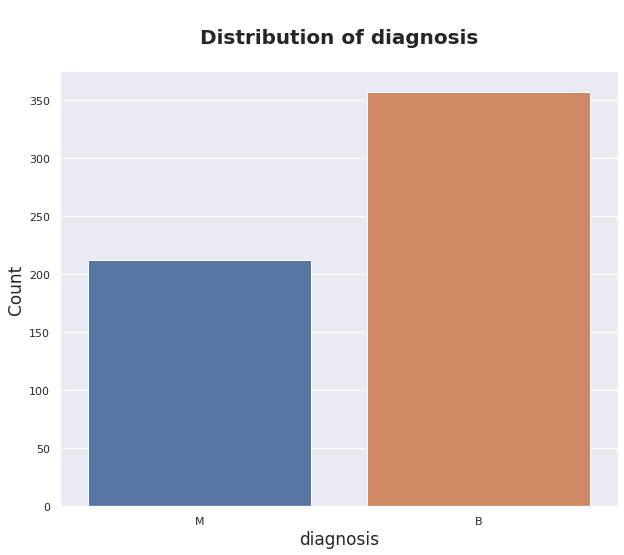

In [57]:
count_plot(df,'diagnosis')

In [58]:
def encoding_data(df):
  for column in df.columns:
    if df[column].dtype == np.int64 or df[column].dtype == np.float64:
      continue
    df[column] = LabelEncoder().fit_transform(df[column])
  
  return df

In [59]:
encoded_df = df.copy()
encoding_data(encoded_df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [60]:
def corr_matrix(df,title:str,save_as):
    plt.figure(figsize=(25, 20))
    res=sns.heatmap(df.corr(), annot=True,fmt='.2f');
    res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)
    res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15)
    plt.title(title,size=18, fontweight='bold')
    plt.savefig(f'../charts/{save_as}')
    plt.show

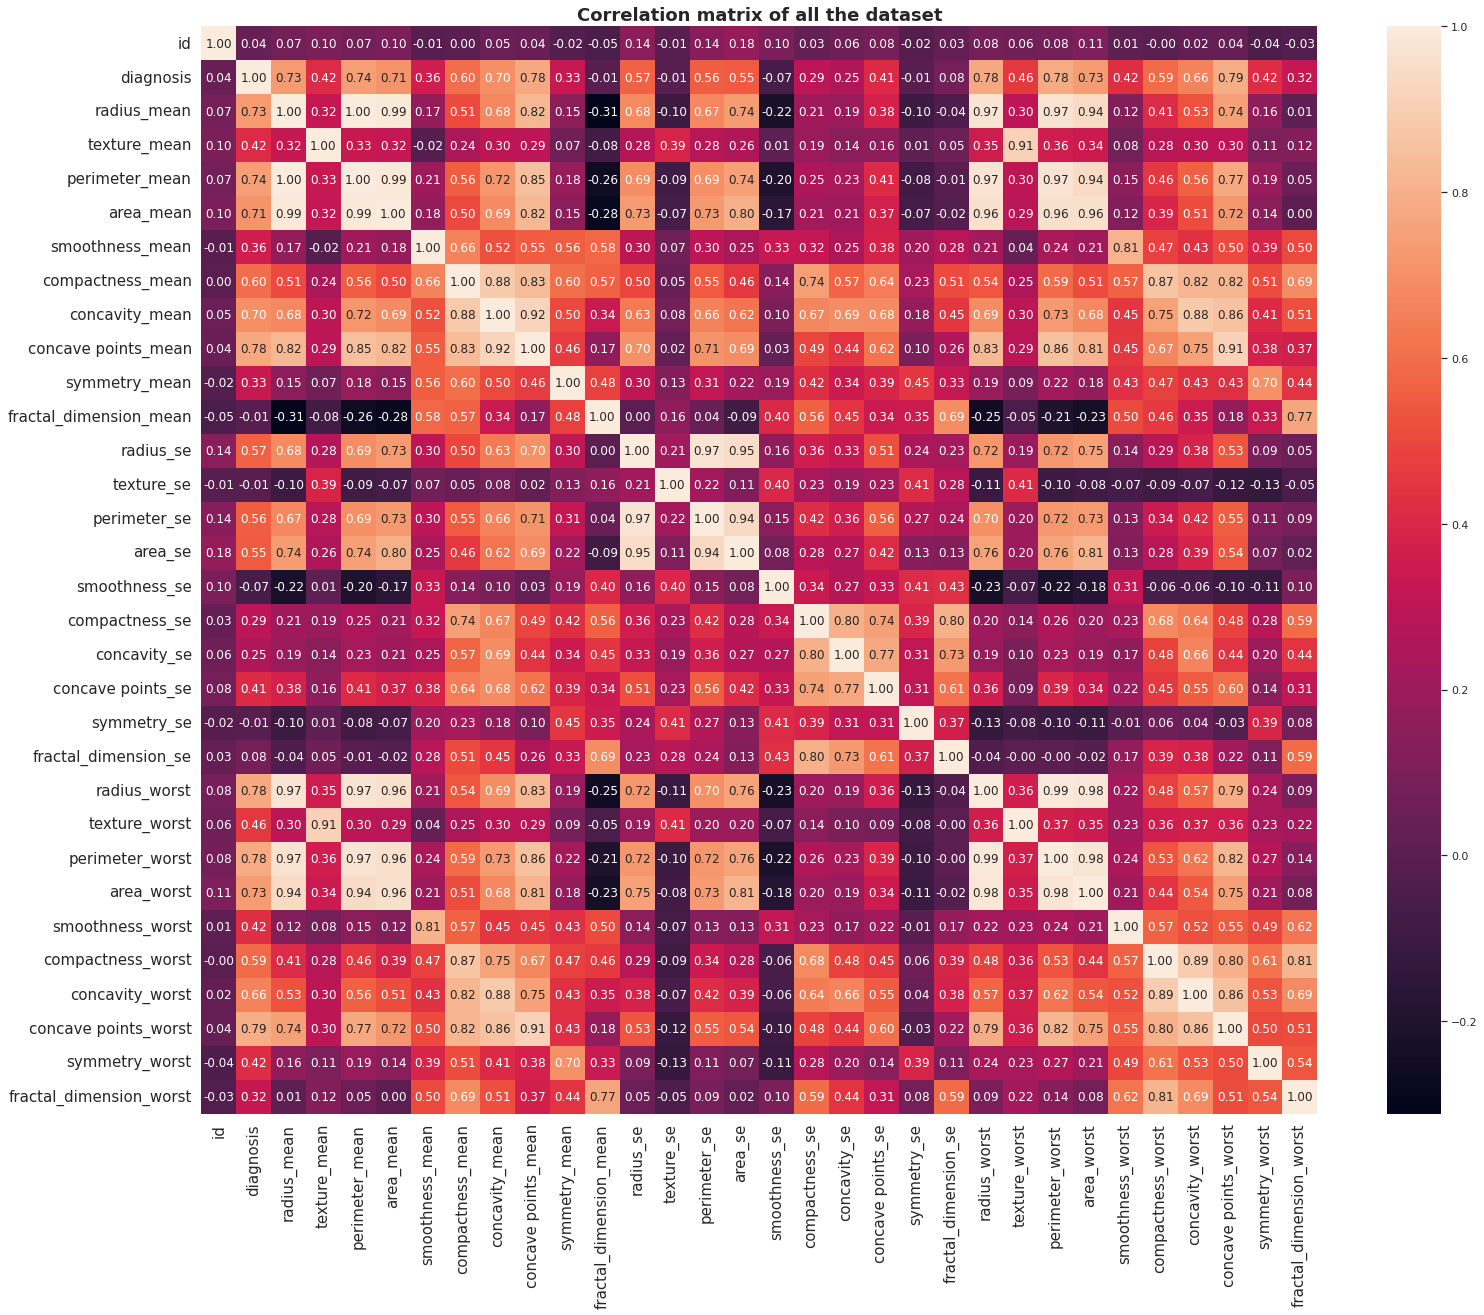

In [61]:
corr_matrix(encoded_df,'Correlation matrix of all the dataset','general_correlation.jpg')

In [62]:
def find_high_corr(df):
    high_corr= df.corr()
    high_corr_columns = high_corr.index[abs(high_corr['diagnosis'])>=0.5]
    
    return high_corr_columns

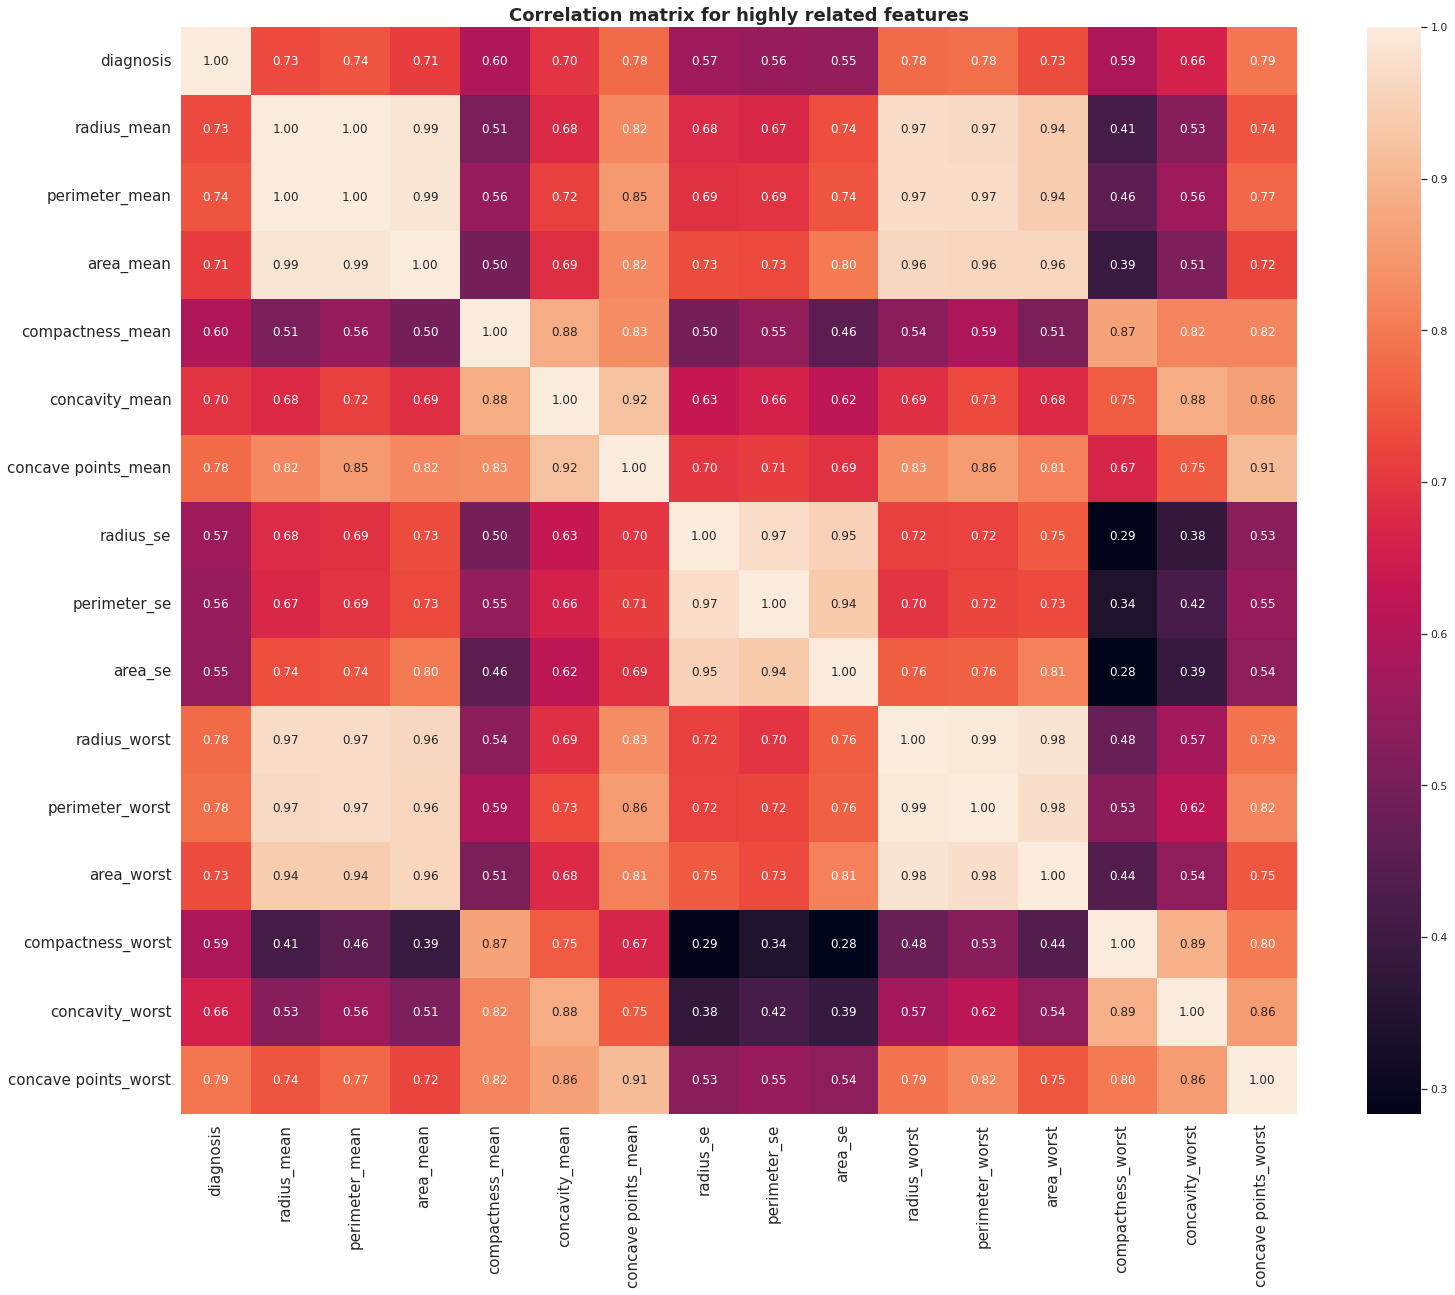

In [63]:
columns_for_analysis = find_high_corr(encoded_df)
corr_matrix(encoded_df[columns_for_analysis],'Correlation matrix for highly related features','higher_correlation.jpg')

In [64]:
def plot_ditribution(df,columns):
    for col in columns:
        sns.displot(df, x=col, hue="diagnosis",kind='kde',multiple='stack',palette=["red", "green"])
        plt.savefig('../charts/'+col+'_distribution.jpg')
        plt.show()

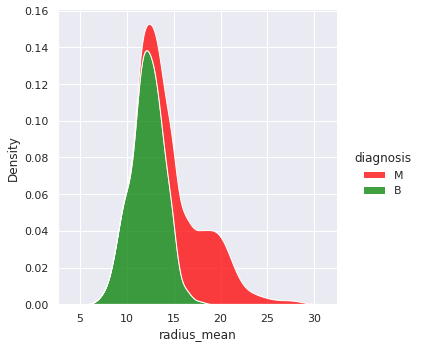

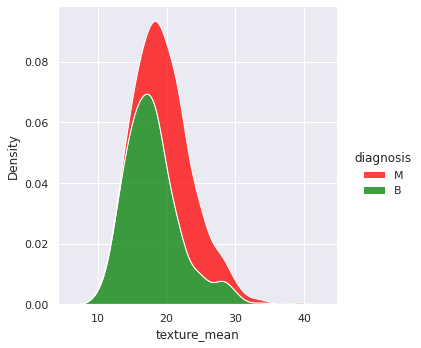

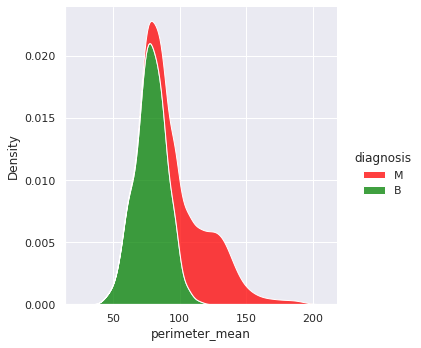

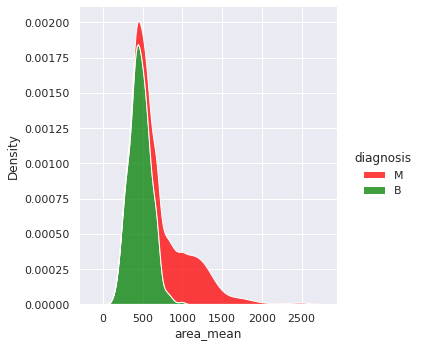

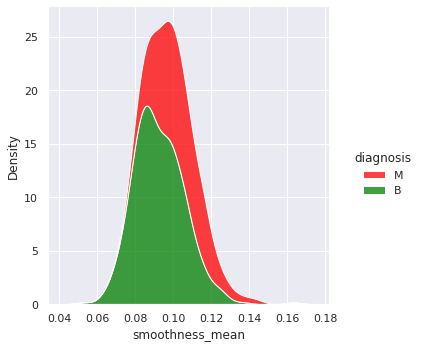

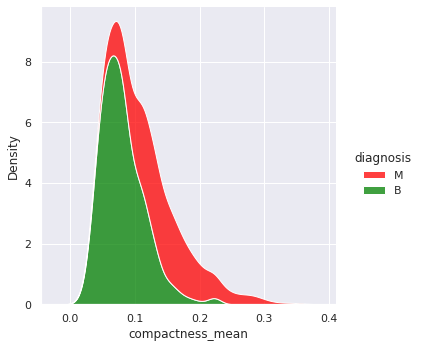

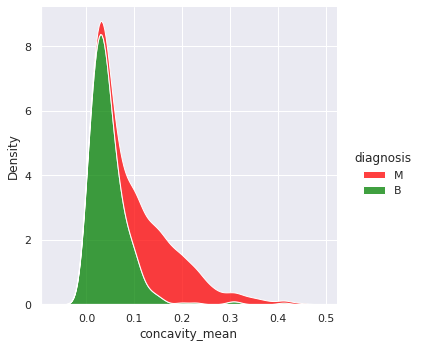

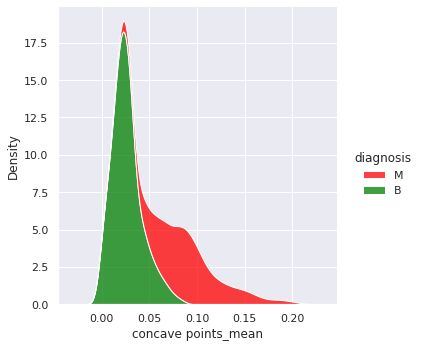

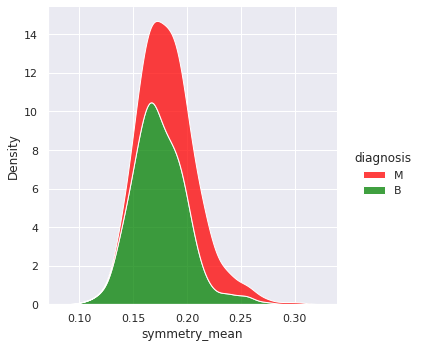

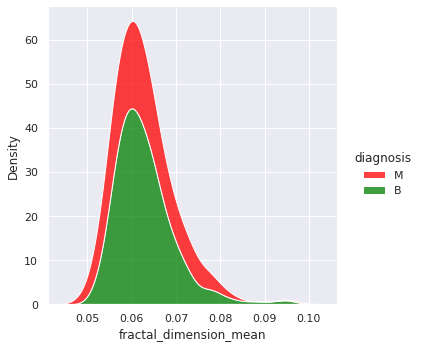

In [65]:
mean_col = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

plot_ditribution(df,mean_col)

In [66]:
def feature_vs_target(df,features, fields):
    fig, axs = plt.subplots(10,3, figsize=(20,45))
    for col in range(len(features)):  
        for f in range(len(fields)):  
            sns.histplot(df, 
                        x=features[col]+"_"+fields[f], 
                        hue="diagnosis", element="poly", 
                        stat="count", 
                        palette=["red", "green"],
                        ax=axs[col][f])

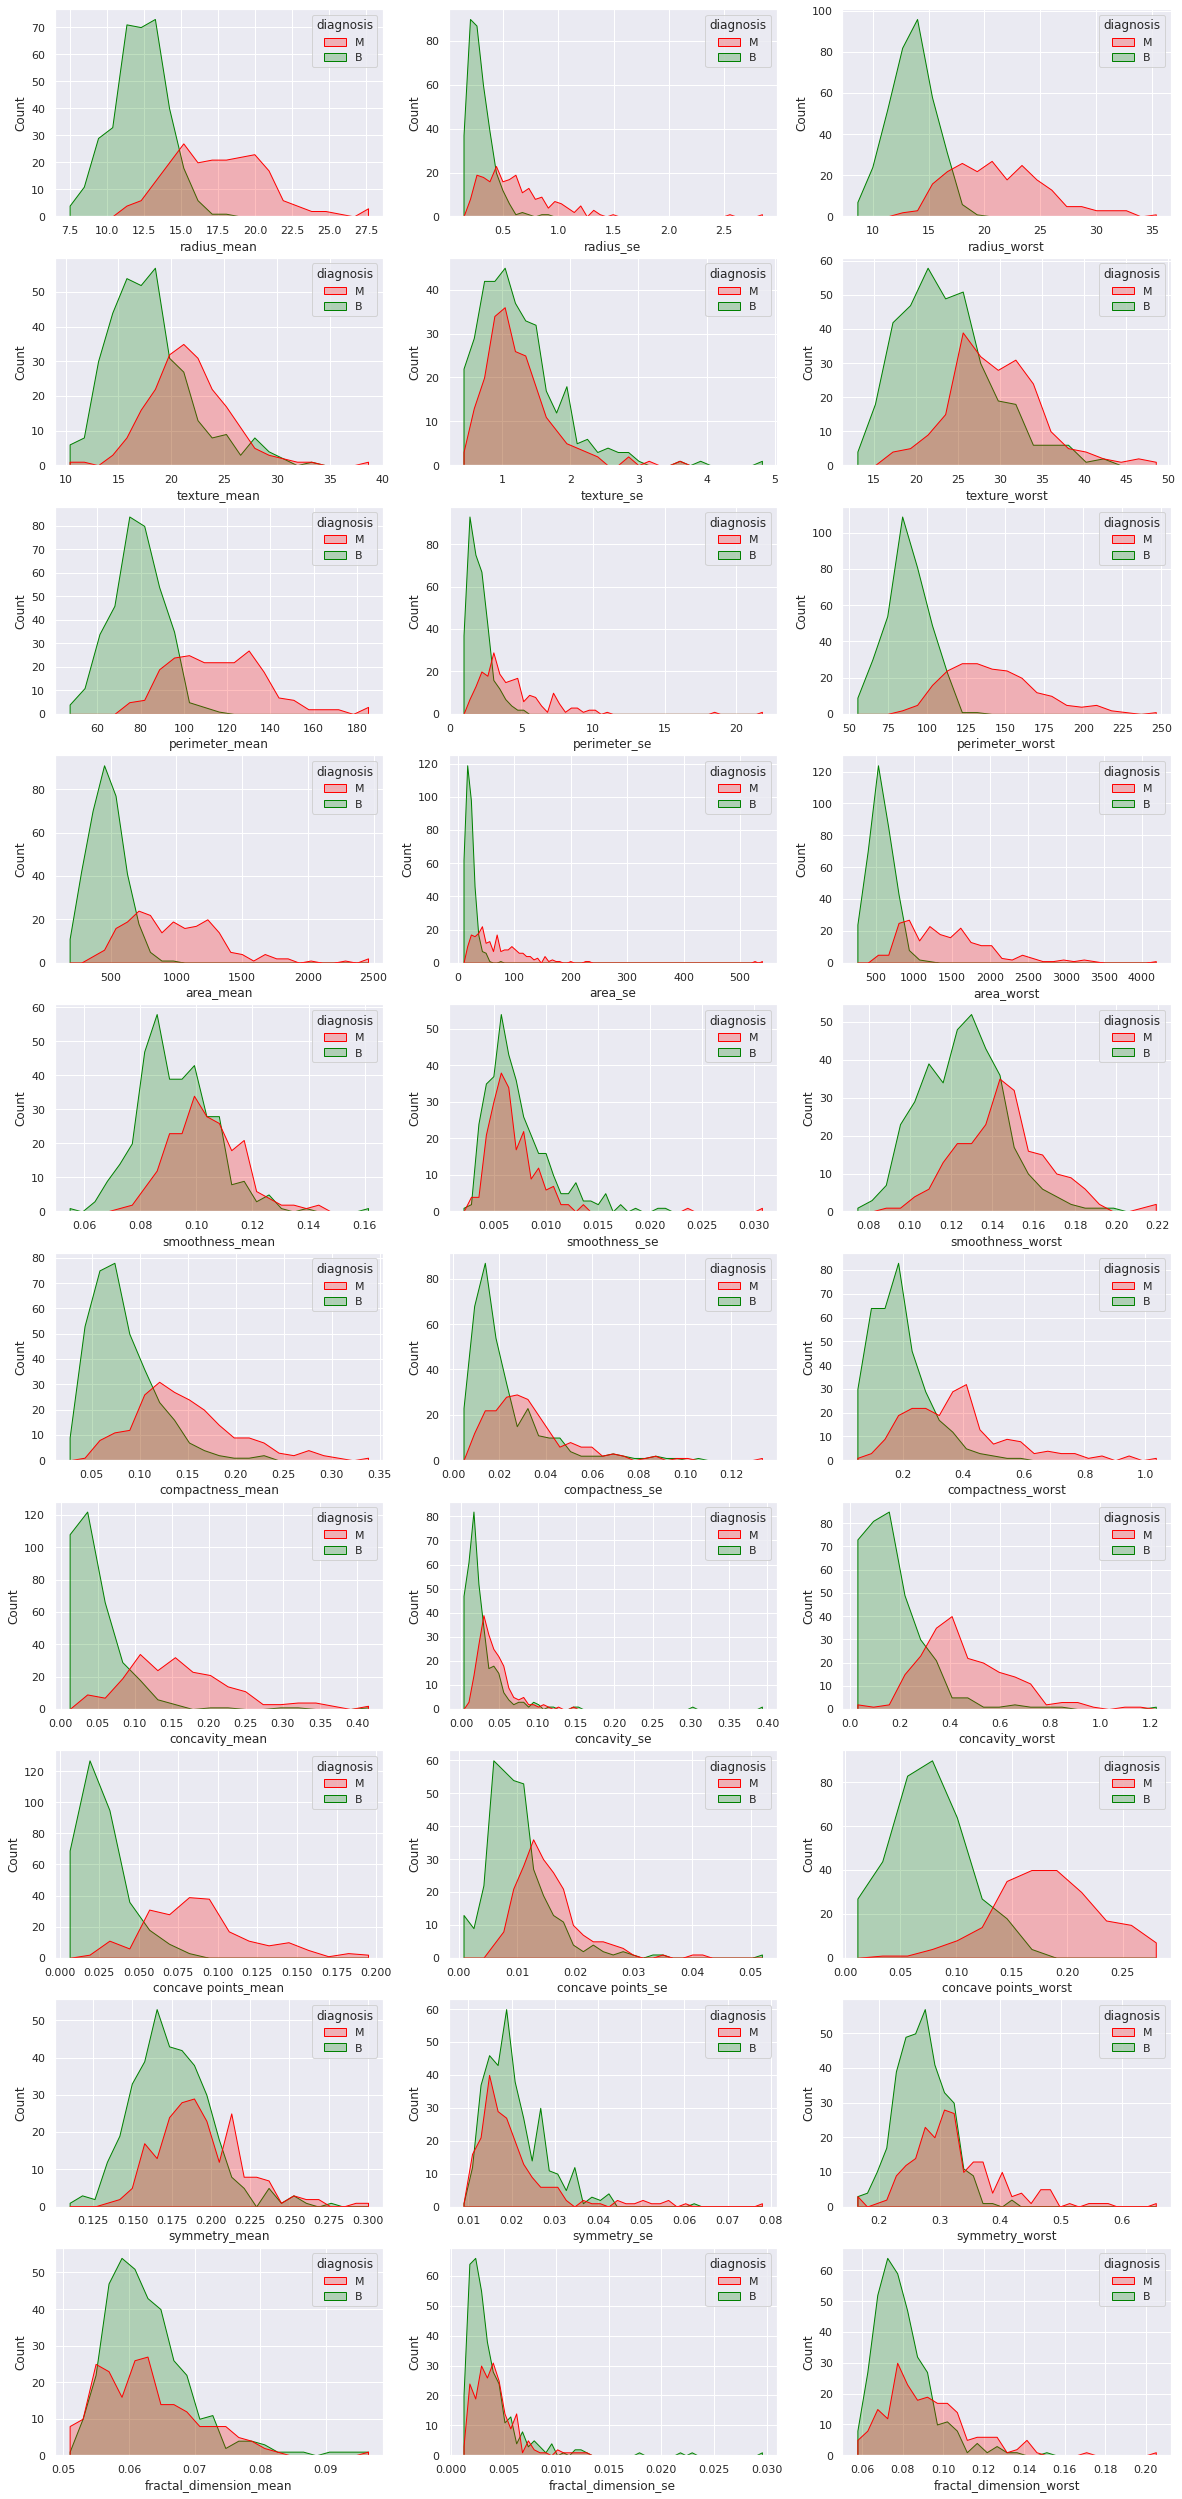

In [67]:
columns = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal_dimension"]
fields = ["mean", "se", "worst"]
feature_vs_target(df,columns,fields)

In [68]:
def plot_outlier(df,columns,title):
    sns.set(style="darkgrid")
    data_frame = pd.melt(df, id_vars='diagnosis', value_vars=columns)
    plt.figure(figsize=(15, 8))
    res=sns.boxplot(x='variable', y='value',hue='diagnosis', data=data_frame,palette=["red", "green"])
    plt.title(title, size=18, fontweight='bold')
    res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 15)
    res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 15)
    plt.show()

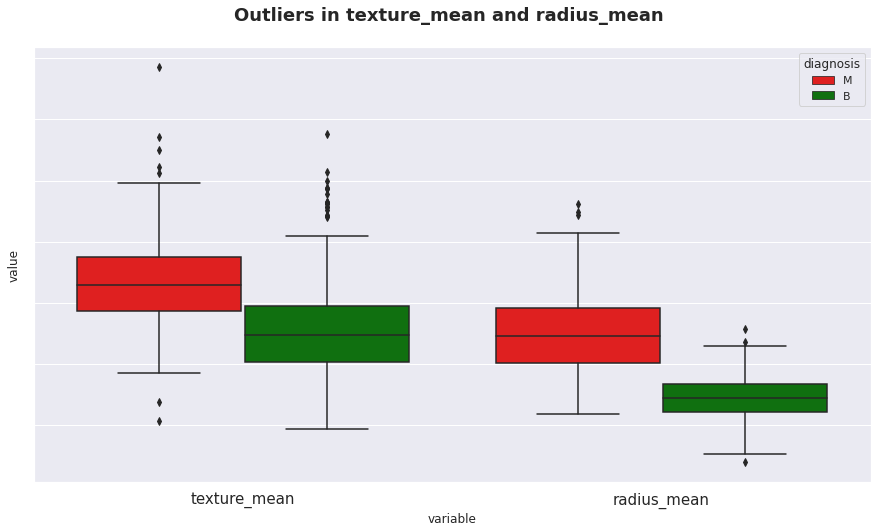

In [69]:
columns = ['texture_mean', 'radius_mean']
plot_outlier(df,columns,'Outliers in texture_mean and radius_mean \n')

In [70]:
def fix_outlier(df):
    column_name=list(df.columns[2:])
    for i in column_name:
        upper_quartile=df[i].quantile(0.75)
        lower_quartile=df[i].quantile(0.25)
        df[i]=np.where(df[i]>upper_quartile,df[i].median(),np.where(df[i]<lower_quartile,df[i].median(),df[i]))
    return df

df_clean = fix_outlier(df)

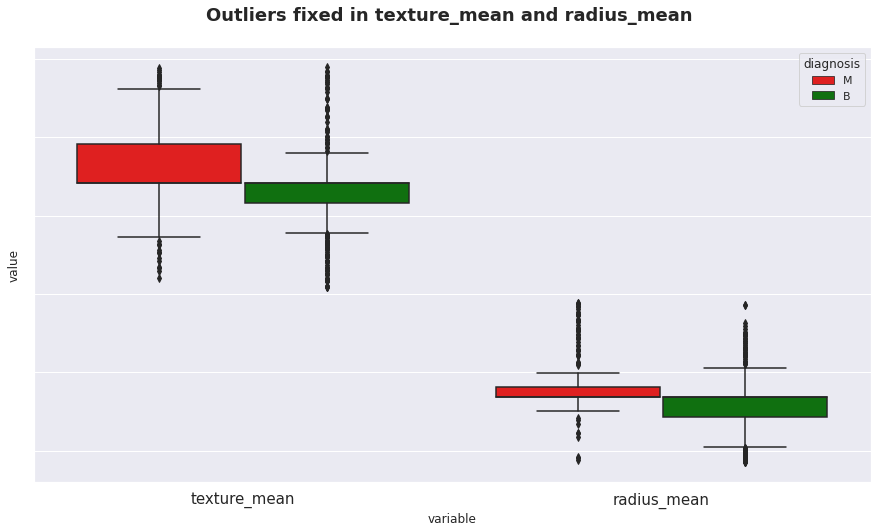

In [71]:
plot_outlier(df_clean,columns, 'Outliers fixed in texture_mean and radius_mean \n')

In [72]:
def scaler(df):
    df_new = (df-df.min())/(df.max()-df.min())
    return df_new

In [73]:
encoded_df_clean = encoding_data(df_clean)
scaled_df = scaler(encoded_df_clean)
scaled_df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,1.0,0.409314,0.474245,0.382648,0.360927,0.501849,0.423183,0.316195,0.245670,...,0.3391,0.501157,0.328167,0.301037,0.500000,0.337155,0.418033,0.362807,0.471111,0.416101
1,0.000915,1.0,0.409314,0.284192,0.382648,0.360927,0.501849,0.209530,0.566937,0.928665,...,0.3391,0.269676,0.328167,0.301037,0.244898,0.205315,0.473547,0.362807,0.364444,0.851600
2,0.092495,1.0,0.409314,0.902309,0.382648,0.360927,0.501849,0.423183,0.316195,0.245670,...,0.3391,0.515046,0.328167,0.301037,0.945578,0.337155,0.418033,0.362807,0.471111,0.781765


In [74]:
new_df = scaled_df.drop(['id'],axis=1)
new_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.409314,0.474245,0.382648,0.360927,0.501849,0.423183,0.316195,0.245670,0.511834,...,0.33910,0.501157,0.328167,0.301037,0.500000,0.337155,0.418033,0.362807,0.471111,0.416101
1,1.0,0.409314,0.284192,0.382648,0.360927,0.501849,0.209530,0.566937,0.928665,0.571006,...,0.33910,0.269676,0.328167,0.301037,0.244898,0.205315,0.473547,0.362807,0.364444,0.851600
2,1.0,0.409314,0.902309,0.382648,0.360927,0.501849,0.423183,0.316195,0.245670,0.511834,...,0.33910,0.515046,0.328167,0.301037,0.945578,0.337155,0.418033,0.362807,0.471111,0.781765
3,1.0,0.409314,0.747780,0.083305,0.360927,0.501849,0.423183,0.316195,0.245670,0.511834,...,0.32872,0.627315,0.357472,0.092140,0.500000,0.337155,0.418033,0.362807,0.471111,0.416101
4,1.0,0.409314,0.474245,0.382648,0.360927,0.735869,0.423183,0.316195,0.245670,0.562130,...,0.33910,0.501157,0.328167,0.301037,0.707483,0.301199,0.418033,0.362807,0.471111,0.258002


In [75]:
X = df_clean.drop(["diagnosis"], axis=1)
y = df_clean["diagnosis"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.2, random_state=10
)

In [77]:
classifier = RandomForestClassifier(n_estimators=100)

In [78]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
y_pred = classifier.predict(X_test)

In [80]:
print ('Accuracy Score of the random forest regressor is :',accuracy_score(y_test, y_pred))

Accuracy Score of the random forest regressor is : 0.8947368421052632


In [81]:
importances = classifier.feature_importances_
labels = X.columns
feature_df = pd.DataFrame(list(zip(labels, importances)), columns=["feature", "importance"])
feature_df = feature_df.sort_values(by='importance', ascending=False, )
significant_features_df = feature_df.head(10)
significant_features_df.shape
significant_features_df.head()

,feature,importance
27,concavity_worst,0.081801
28,concave points_worst,0.068499
24,area_worst,0.063721
8,concave points_mean,0.058369
21,radius_worst,0.058136


In [82]:
def plot_bar(df,title,save_as):
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x="importance", y="feature", data=df)
    ax.set_xlabel('Importance', fontsize=20)
    ax.set_ylabel('Feature', fontsize=20)
    ax.set_title(title, fontsize=30)
    plt.savefig('../charts/'+save_as)
    plt.show()

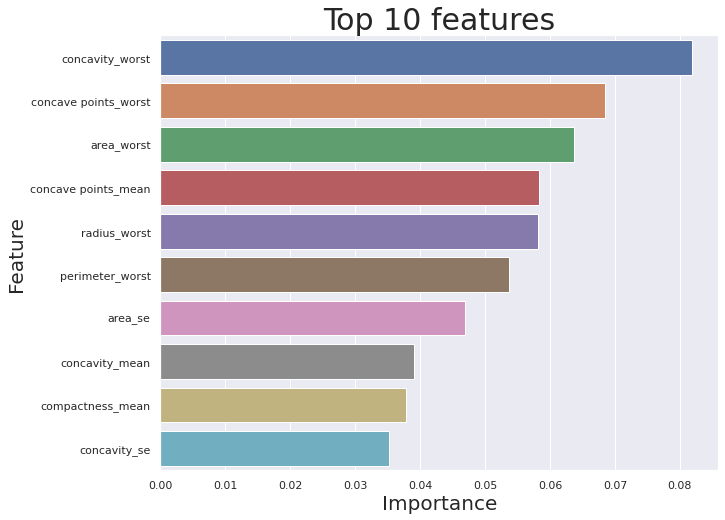

In [83]:
plot_bar(significant_features_df,'Top 10 features', 'top_10_features.jpg')